In [170]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import time

In [171]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

x_train = train_set.drop(['median_house_value'], axis=1)
y_train = train_set['median_house_value']

x_test = test_set.drop(['median_house_value'], axis=1)
y_test = test_set['median_house_value']

In [172]:
x_train,x_test,y_train,y_test=np.array(x_train),np.array(x_test),np.array(y_train),np.array(y_test)

In [173]:
x_train,y_train

(array([[0.70318725, 0.05851064, 0.09803922, ..., 1.        , 0.98072654,
         2.72155785],
        [0.54681275, 0.1712766 , 0.29411765, ..., 0.        , 1.14585277,
         2.38773257],
        [0.46414343, 0.45106383, 0.07843137, ..., 0.        , 0.89961299,
         1.89394751],
        ...,
        [0.87450199, 0.02659574, 0.29411765, ..., 0.        , 0.59566567,
         1.996594  ],
        [0.25      , 0.39361702, 0.37254902, ..., 1.        , 0.6395219 ,
         1.87913256],
        [0.22310757, 0.54255319, 0.33333333, ..., 0.        , 0.87927019,
         2.11026728]]),
 array([259800., 410800.,  83000., ...,  72600., 362500., 331600.]))

In [174]:
def cost(w,b,x,y):
    cost = np.sum((x@w+b-y)**2)
    return cost/(2*len(x_train))

def derivative_x(w,b,j):    
    derivative = np.sum((x_train@w+b-y_train).T*x_train[:,j])
    return derivative/len(x_train)

def derivative_b(w,b):
    derivative = np.sum(x_train@w+b-y_train)
    return derivative/len(x_train)

def gradient_decent(w,b,lr):
    w_new=w
    b_new=b
    for j in range(len(x_train[0])):
        w_new[j]=w_new[j]-lr*(derivative_x(w,b,j))
    b_new=b_new-lr*derivative_b(w,b)
    return w_new,b_new

In [175]:
w=[0]*len(x_train[0])
b=0
cost_list=[]

start = time.time() 
for epoch in range(500):
    w,b=gradient_decent(w,b,1.25)
    if((epoch+1)%5==0):
        print("Epoch : ",epoch+1 ," , Cost : ",cost(w,b,x_train,y_train))
    cost_list.append(cost(w,b,x_train,y_train))
end = time.time()
print("Time taken for training in 500 Epoch: ",end-start)


Epoch :  5  , Cost :  3954896058.9804015
Epoch :  10  , Cost :  3418686292.3385377
Epoch :  15  , Cost :  3183580270.877283
Epoch :  20  , Cost :  3060394642.002488
Epoch :  25  , Cost :  2986469783.9187446
Epoch :  30  , Cost :  2935294220.451515
Epoch :  35  , Cost :  2895103933.6429567
Epoch :  40  , Cost :  2860636621.580712
Epoch :  45  , Cost :  2829525968.745422
Epoch :  50  , Cost :  2800693946.070179
Epoch :  55  , Cost :  2773633460.080396
Epoch :  60  , Cost :  2748089185.840432
Epoch :  65  , Cost :  2723916254.5892196
Epoch :  70  , Cost :  2701018172.556468
Epoch :  75  , Cost :  2679319882.565141
Epoch :  80  , Cost :  2658756300.474067
Epoch :  85  , Cost :  2639267583.7420397
Epoch :  90  , Cost :  2620797269.696028
Epoch :  95  , Cost :  2603291595.008908
Epoch :  100  , Cost :  2586699271.3574467
Epoch :  105  , Cost :  2570971415.45942
Epoch :  110  , Cost :  2556061514.7936316
Epoch :  115  , Cost :  2541925387.4679794
Epoch :  120  , Cost :  2528521125.7143064
Epo

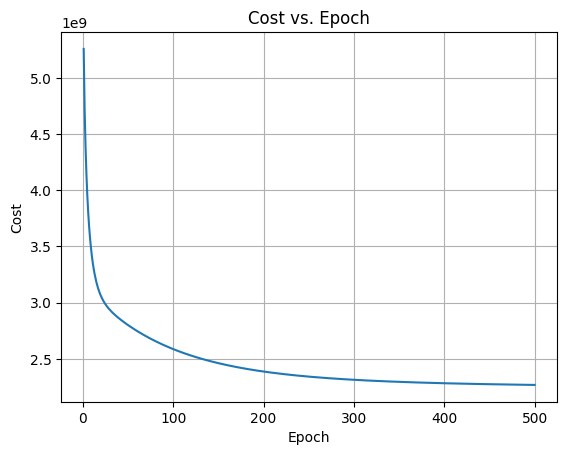

In [176]:
plt.plot(range(1, 501), cost_list)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs. Epoch')
plt.grid(True)
plt.show()

In [177]:
y_hat=[0]*len(x_test)
for i in range(len(x_test)):
    y_hat[i]=np.dot(x_test[i],w)+b

In [178]:
print("Mean absolute error:", mean_absolute_error(y_test, y_hat))
print("Mean squared error:", mean_squared_error(y_test, y_hat))
print("R² score:", r2_score(y_test, y_hat))

Mean absolute error: 48863.188315924395
Mean squared error: 4676480330.594106
R² score: 0.6579974941186661


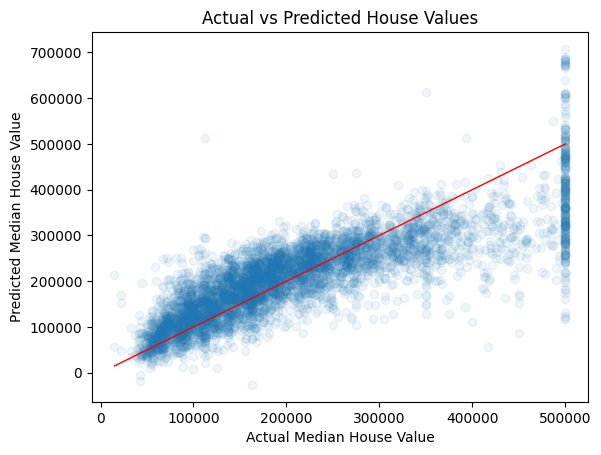

In [179]:
plt.scatter(y_test, y_hat, alpha=0.07)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=1)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Values")
plt.show()